# Lab 3: More on Beam Bending

We have been studying the shape of a bent beam through the lens of [Euler-Bernoulli](https://en.wikipedia.org/wiki/Euler–Bernoulli_beam_theory) beam theory, which says that if the slope of a beam is small, its shape -- specifically, the vertical deflection v(x) -- can be described with the equation of an elastic curve:

\begin{equation}
B \frac{d^4v}{dx^4}=q(x),
\tag{1}
\end{equation}
where $B = EI$ is the bending or flexural rigidity, $E$ is Young's elastic modulus, $I$ is the [second moment of area](https://en.wikipedia.org/wiki/Second_moment_of_area), and $q(x)$ is the distributed load acting transverse or orthogonal to the beam's neutral axis - it has units of force per unit length. I have assumed that $E$ and $I$ do not change along the $x$ axis of the beam. 

As we've seen, the equation (1) conveniently takes different forms depending on the order of the differential equation for v(x): 

\begin{equation}
B \frac{d^3v}{dx^3}=V(x),
\tag{2}
\end{equation}

for the shear force V(x), or 

\begin{equation}
B \frac{d^2v}{dx^2}=M(x),
\tag{3}
\end{equation}

for the moment M(x). The linear ODEs in Eqs. (1)-(3) are simple to solve analytically by integration.

In the previous lab we focused primarily on the deflection of a cantilevered beam under under various concentrated transverse loads. Euler-Bernoulli beam theory also describes forces and moments, and can therefore be used to study stresses. Transverse loading causes (1) bending moments, which lead to normal stresses which, in turn, cause strains through the beam's cross-section, and (2) shear forces, which lead to shear stresses, which cause [shear strains](https://en.wikipedia.org/wiki/Shearing_(physics)). Shear strain is deformation in which parallel surfaces (think layers of a beam or pages of a book (!)) slide past one another. 

In most beams, shear stresses are negligible compared to normal stresses. As such, shear effects are often neglected in analysis. Euler–Bernoulli beam theory does not account for the effects of transverse shear strain. 

In this lab, we'll perform simple experiments to help visualize shear strains, and to try to grasp what's going on internally in a beam that resists these strains. We will also return to Euler-Bernoulli beam equation (the elastic curve) to see what it means to neglect shear in theory.

## Prelab Questions:

Read, but do not yet complete, the  [Experiments](#exp) section. Then discuss within your group and answer the following questions:

<b>(1.) Which do you think will produce more deflection: the beam whose layers are bound (Part 1) or the one with the unbound edge at the free end (Part 2)? Or, will the deflection be the same? Why? :</b>

...enter your answer here...

<b>(2.) Describe (qualitatively, in terms of angles, etc.) what you think the end of the beam will look like in each case. :</b>

...enter your answer here...

<b>(3.) In these experiments, self-weight will act as a distributed load. (a.) What would the magnitude of the load be for a cantilever "beam" which is just a single sheet of paper? (b.) If it were two sheets completely glued together? (c.) N sheets (essentially your case for Part 1)? :</b>

...enter your answer here...

<b>(4.) Now imagine a cantilever "beam" comprised of two sheets of paper that are not glued together. If you used the value you gave for the distributed load of one sheet in (3a.) to predict the beam's deflection, how do you think the prediction would compare to the experiment? What about if you used the value you gave for (3b.)? :</b>

...enter your answer here...

<b>(5.) How would you calculate the second moment of area, I, for the bound beam in Part 1? Is it the same for the one with "loose" layers in Part 2? Explain your answer.:</b>

...enter your answer here...

<b>(6.) Do you think Euler-Bernoulli beam theory will accurately predict the deflection $w$ of the beam in Part 1? Why or why not? In Part 2? Why or why not?:</b>

...enter your answer here...

## Experiments <a id='exp'></a>

1. Find a paperback book, magazine, notebook, other floppy book, or a stack of papers that you can staple or otherwise bind one edge. Also find something to clamp it with, e.g. a stack of other, heavier books. 

 <u> Part 1: Bound end </u>

2. Cantilever the magazine "beam" (it will be very wide) by clamping the <b>free</b> edge (the one opposite the binding.) Let the bound end hang freely.

3. Adjust L, the distance between your clamp and the bound edge, such that the slopes are not too large, then measure and record L.

4. You need a reference object in the frame. Measure it.

5. Take a photo, ensuring that the camera is horizontal in space, and level with and perpendicular to the subject.

6. Take a second photo, this time closer up. Center and focus on the <b>end</b> of the beam. Move the reference if necessary such that it's still in the frame. Ensure that the camera is perfectly horizontal and perpendicular to the beam.

 <u> Part 2: Free end </u>

7. Cantilever the beam by clamping the <b>bound</b> edge. Let the edge opposite the binding hang freely, and adjust so that $L$ is the same as in Part 1.

8. Take a photo, ensuring that the camera is horizontal in space, and level with and perpendicular to the subject.

9. Take another photo, this time closer up. Center and focus on the <b>end</b> of the beam. Move the reference if necessary such that it's still in the frame. Ensure that the camera is perfectly horizontal and perpendicular to the beam.

10. Add images (descriptively named) to your shared Google drive.

<a href="https://ibb.co/ZKxR9YG"><img src="https://i.ibb.co/5vLXZnG/Example-bound-noangle.jpg" alt="Example-bound-noangle" border="0"></a>


In [1]:
#install_mpld3 = !pip install "git+https://github.com/mpld3/mpld3" 
import math         # sine, cosine, sqrt, etc.
import numpy as np  # so we can work with matrices
import pandas as pd               # for data/tables

import matplotlib
import matplotlib.pyplot as plt # plotting

from skimage import io            # working with images
from IPython.display import Image,display # images in colab
import mpld3                      # interacting with images
from mpld3 import plugins         # getting pixel data from images

In [2]:
### run to define a function we can use later:
def get_angle(x1,y1,x2,y2,x3,y3):
    """ Accepts 3 points where point 2 is the intersection. 
    Calculates angle 1-2-3 using dot product, returns angle in radians. 
    """
    p1 = np.array([x1,y1])
    p2 = np.array([x2,y2])
    p3 = np.array([x3,y3])
    vec1 = p1-p2
    vec2 = p3-p2
    mag1 = np.sqrt(np.dot(vec1,vec1))
    mag2 = np.sqrt(np.dot(vec2,vec2))
    cos_angle = np.dot(vec1,vec2)/(mag1*mag2)
    angle = np.arccos(cos_angle)
    return(angle)

## Euler-Bernoulli Beam Theory (The Elastic Curve): Cantilever with Uniformly Distributed Load

<a href="https://ibb.co/pzJptd0"><img src="https://i.ibb.co/nczSHjg/loading-schematic.jpg" alt="loading-schematic" border="0"></a>

We know that integrating the beam equation (1), (2), or (3) and applying appropriate boundary conditions gives the vertical deflection $v$ along the length (as a function of x).

The "beams" in your experiments are cantilevers which deform under self-weight, where the self-weight acts as a uniformly distributed load. 

[Solving](https://www.youtube.com/watch?v=DQxWDiAlIIs) the beam equation for these loading conditions gives the following (you can also refer to Appendix A): 

$$ v(x) = \frac{-q x^2}{24 B}(x^2-4Lx+6L^2) \tag{4} $$

The maximum deflection occurs at x=L. Plugging this in to Eq. (4) shows us that this deflection is given by:

$$ v(x=L) = \frac{-q L^4}{8 B} \tag{5} $$

We'd like to assess how this prediction compares to your experiments. We know we can use image processing to find the deflection, so we just need the load per unit length q, the bending rigidity $B=EI$.

#### Distributed load: self-weight 
How can we find the magnitude of the distributed load q (without requiring a scale)? Start with the density $\rho$ of the material (paper). Note that:

$$\rho g = \frac{m g}{V} \tag{6}$$
 
for volume $V=Lwh$ with length L, width w, thickness h, and gravitational constant g. This is a force over length cubed. 
We need force over length, so we multiply both sides of Eq. (6) by wh to get: 

$$q = \rho g w h \tag{7}$$

In the code cell below, input the density, width and thickness values, then use the variables to calculate q for the book.

In [6]:
### LSM: DELETE EXCEPT g,q.
rho = 1201 ### material density: kg/m^3
g = -9.81 # gravitational constant: m/s^2
w = 0.275 ### width: m
L = 0.092 # m### length: m
h_book = 0.013 ### thickness of the book: m

q_book = rho*g*w*h_book # distributed load from self-weight of the book: kg/m

#### Bending rigidity

The bending rigidity of a book is nontrivial, and is actually the subject of active research -- see this short [Twitter thread](https://twitter.com/PoinclouxS/status/1234775757043441666) on the topic! 

We will *not* attempt to calculate this value here. However, we can use the theoretical value for the end deflection in Eq. (5) to get a measurement for an <i> effective </i> bending stiffness $B_{effective}$.

Solving Eq. (5) for B gives:

$$ B_{effective} = \frac{-q L^4}{8 v(L)} \tag{8}$$ 

Let's use the <b> bound </b> book (Part 2 in the [Experiments](#exp) section) for this calculation. 

1. Load the image of the full view of the bound book. 
2. Measure a reference distance -- this can be an object you placed, or a geometric property like the thickness of the book.
3. Measure the vertical deflection v(L) for the <b> midline </b> of the beam.

In [2]:
#### LSM DELETE
# path_unbound = 'example_unbound.jpg'
# path_bound = 'example_bound.jpg'
# im_unbound = io.imread(path_unbound)
# im_bound = io.imread(path_bound) 

In [3]:
path_bound = str(input("Paste or type your file path for the bound beam: "))
im_bound = io.imread(path_bound)

fig, ax = plt.subplots(figsize=(10,5))
io.imshow(im_bound)
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

In [48]:
### LSM: DELETE 
ref_mm_bound = 6.34*2 ### size of reference object in mm
ref_pix_bound = 382-252 ### size of reference object in pixels
v_pix = 567-125

pix_m_bound = ref_pix_bound*1000/ref_mm_bound
v_L = v_pix/pix_m_bound

Now use this measurement and your previously defined variables for q, L, and I to calculate E using Eq. (8):

In [55]:
B = -q_book*L**4/(8*v_L) # Calculate effective stiffness from Eq. (8): N*m^2
print('Effective B = '+str(round(B,5)) +' N*m^2$')

Effective B = 0.00875 N*m^2$


## Deflection of the Entire Beam

Let’s assume $B_{effective}$ for the bound-end beam is a good approximation for that of the unbound beam.

Then we have all of the values we need to use Eq. (4) to predict the deflection over the length of the book for both cases.

In [56]:
x = np.arange(0,L,L/30) # create array of 30 points over the length of L
v_book = -(q_book*x**2)/(24*B)*(x**2-4*L*x+6*L**2) # Eq (4), theoretical deflection over x

We can overlay this curve on our images after we grab the "zero" coordinates. 

Scroll back up to the image of the bound beam. Input the pixel coordinates corresponding to x=y=0, that is, the position of the midline of the beam at the clamp.

In [57]:
x0_bound = 132
y0_bound = 115

# convert back to pixels so we can overlay the theoretical curve over the experimental photo.
x_pix_bound = x*pix_m_bound + x0_bound # shift right by an amount x0 so the curve is zeroed
v_book_pix_bound = v_book*pix_m_bound + y0_bound # shift down by an amount y0 so the curve is zeroed

Now load the image of the unbound beam get the reference size and the zero coordinates for that image.

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
io.imshow(im_unbound)
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

In [58]:
x0_unbound = 85.7
y0_unbound = 189

ref_mm_unbound = 12.7
ref_pix_unbound = np.sqrt((912-876)**2+(175-56.8)**2)
pix_m_unbound = ref_pix_unbound*1000/ref_mm_unbound

# convert back to pixels so we can overlay the theoretical curve over the experimental photo.
x_pix_unbound = x*pix_m_unbound + x0_unbound # shift right by an amount x0 so the curve is zeroed
v_book_pix_unbound = v_book*pix_m_unbound + y0_unbound # shift down by an amount y0 so the curve is zeroed

Now let's see how the theoretical curve compares to the experiments.

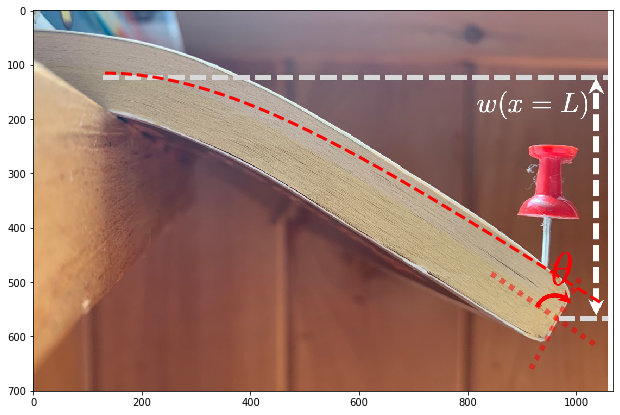

In [59]:
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(im_bound)
plt.plot(x_pix_bound,v_book_pix_bound,'r--',linewidth=3)

# plt.plot(L*pix_m_bound + x0_bound,v_pix + y0_bound,'rx')
plt.show()

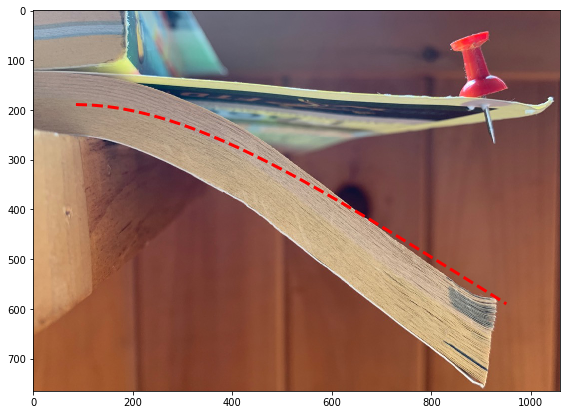

In [60]:
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(im_unbound)
plt.plot(x_pix_unbound,v_book_pix_unbound,'r--',linewidth=3)
plt.show()

## Discussion of Deflection Results 

<b>(1.) Which beam deflected more: the beam whose layers are bound (Part 1) or the one with the unbound edge at the free end (Part 2)? Why? Was the difference predictible from Euler-Bernoulli beam theory? :</b>

...enter your answer here...

<b>(2.) Did Euler-Bernoulli beam theory accurately predict, overpredict, or underpredict the deflection $v$ of each beam? Why? Which prediction was closer, and why do you think that is?:</b>

...enter your answer here...

<b>(3.) Say you wanted to attempt to predict the maximum deflection of only the bottom page of paper using Euler-Bernoulli beam theory. 
    
(a.) Outline how you would do this, e.g., which are the relevant quantities and equations? (You don't need to solve, but you can if you want to!) 

(b.) Do you think you'd be more successful in predicting the deflection of the bottom sheet for the bound or unbound case? Why?:</b>

...enter your answer here...

## Visualizing shear

<a href="https://ibb.co/sJ7T9Wg"><img src="https://i.ibb.co/n8pXMPw/shear-schematic.png" alt="shear-schematic" border="0"></a>

Remember that shear strain is defined as the change in an initally 90 degree ($\pi/2$ rad) angle, that is, 

$$\gamma = \pi/2-\theta'
\tag{9}$$

where $\gamma$ represents the shear strain. 

Consider the end of the book, at x=L. Before any bending occurs, the angle $\theta$ between the midline (oriented along the x-axis initially) and the edge of the book (oriented along y initially) is 90 degrees.

Let's measure $\theta'$, the deformed angle, in each case, to see how much shear strain occurred due to bending. Your close-up images where you focused on the end of the beam will probably make this easier. 

We would like to know the orientation of the endline with respect to the <i> midline </i> of the beam, i.e. the angle made by the two white dashed lines in the image below. To calculate an angle we need 3 points (the x's in the image, for example). 

You can annotate your own image if you like, or just imagine similar guiding lines to select your points. Hover and record the (x,y) pixel values for: 

1. A point along the midline (midline_x,midline_y)
2. The intersection point between the midline and the endline (intersect_x,intersect_y)
3. A point along the endline (endline_x,endline_y)

<a href="https://ibb.co/tcHJ0Tb"><img src="https://i.ibb.co/NpFy0dL/angle-points.jpg" alt="angle-points" border="0"></a>

Load the bound book image (Part 1) first:

In [441]:
path_bound_zoom = str(input("Paste or type your file path for the bound beam (close-up end view): "))
im_bound_zoom = io.imread(path_bound_zoom)

fig, ax = plt.subplots(figsize=(10,5))
io.imshow(im_bound_zoom)
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

In [62]:
midline_x_bound = 
midline_y_bound = 
intersect_x_bound = 
intersect_y_bound = 
endline_x_bound = 
endline_y_bound = 

thetaprime_bound = get_angle(midline_x_bound,midline_y_bound,intersect_x_bound,
                             intersect_y_bound,endline_x_bound,endline_y_bound)

gamma_bound = np.pi/2-thetaprime_bound 
gamma_bound_deg = np.degrees(gamma_bound)
print('Gamma = ' + str(np.round(gamma_bound,4))+ ' rad (' + str(np.round(gamma_bound_deg,4)) + ' deg)')

### LSM: I'm doing calculations in pixels. Is that bad practice 
### (even though it's an angle not a distance? I do use the vector magnitude so probably)

Do the same thing for the unbound book (Part 2):

In [ ]:
path_unbound_zoom = str(input("Paste or type your file path for the unbound beam (close-up end view): "))
im_unbound_zoom = io.imread(path_unbound_zoom)

fig, ax = plt.subplots(figsize=(10,5))
io.imshow(im_unbound_zoom)
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

In [ ]:
midline_x_unbound = 
midline_y_unbound = 
intersect_x_unbound = 
intersect_y_unbound = 
endline_x_unbound = 
endline_y_unbound = 

thetaprime_unbound = get_angle(midline_x_unbound,midline_y_unbound,intersect_x_unbound,
                             intersect_y_unbound,endline_x_unbound,endline_y_unbound)

gamma_unbound = np.pi/2-thetaprime_unbound #### LSM CONVENTION: POSITIVE OR NEGATIVE SHEAR??? 
gamma_unbound_deg = np.degrees(gamma_unbound)
print('Gamma = ' + str(np.round(gamma_unbound,4))+ ' rad (' + str(np.round(gamma_unbound_deg,4)) + ' deg)')

## Discussion of Shear Results 

<b>(1.) Assume $B_{effective}=EI$. What is the shear stress that caused the amount of strain you observed in the unbound beam? You can use Poisson's ratio $\nu \approx 0.3$ in your calculation. :</b>

...enter your answer here...

<b>(2.) You could argue that the unbound book does what the bound one "wants" to do. With this in mind, what do your previous answers tell you about the strength of the glue/staples/whatever binds the bound edge of your book? :</b>

...enter your answer here...

<b>(3.) Comment on your findings on shear strain as they relate to the deflection you observed in the previous section. Is the beam that deflected more the same as the one that underwent more shear strain? Why do you think this is, or is not, the case? :</b>

...enter your answer here...

## Final Words and Further Reading 

Why does shear matter more for short, thick beams?

Imagine cutting a cross-section through the middle of the bound and unbound beams. Returning to the definition $B=EI$, you would have trouble finding a meaningful difference between the bending stiffnesses of the beams. (Why? Discuss with your group.)
We measured an effective stiffness which may take effects other than E and I into account, but from the perspecitve of Euler-Bernoulli beam theory, this quantity is the same for both beams. 

Remember, the point is NOT to calculate actual values of $B$, it’s to understand why the deflection is not the same

Something layer-specific: How does each layer want to slide? Why does top layer want to slide more? Where is max shear stress? (but how to reconcile with top in tension, bottom in compression?) 

...enter your answer here...


Why does resisting shear, or binding, have a stiffening effect? Since E is strictly a material property, if we assume a homogeneous material it shouldn't matter how the geometry is. stiffening effect, B = EI 

[Timoshenko](https://en.wikipedia.org/wiki/Timoshenko-Ehrenfest_beam_theory)

<img src="https://upload.wikimedia.org/wikipedia/commons/5/57/TimoshenkoBeam.svg" </a>

## Appendix A: Cantilever Solutions

<a href="https://ibb.co/k0DcD2j"><img src="https://i.ibb.co/RP6H6Tf/Hibbler-Appendix-C.jpg" alt="Hibbler-Appendix-C" border="0"></a>

Source: Hibbeler, R. & Yap, K. (2018). Mechanics of materials. Harlow, England: Pearson Education.